# Worldwide COVID 19 DATA ANALYSIS

In [1]:
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, Layout
from bokeh.io import output_notebook
from prettytable import PrettyTable
import locale
import warnings
warnings.filterwarnings('ignore')
locale.setlocale(locale.LC_ALL, '')
output_notebook()
matplotlib.style.use('seaborn')

# Importing the data

In [2]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346611,ZWE,Africa,Zimbabwe,2023-09-30,265753.0,0.0,0.714,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346612,ZWE,Africa,Zimbabwe,2023-10-01,265753.0,0.0,0.714,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346613,ZWE,Africa,Zimbabwe,2023-10-02,265753.0,0.0,0.714,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346614,ZWE,Africa,Zimbabwe,2023-10-03,265753.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [4]:
df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
346606,ZWE,Africa,Zimbabwe,2023-09-25,265748.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346607,ZWE,Africa,Zimbabwe,2023-09-26,265753.0,5.0,0.714,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346608,ZWE,Africa,Zimbabwe,2023-09-27,265753.0,0.0,0.714,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346609,ZWE,Africa,Zimbabwe,2023-09-28,265753.0,0.0,0.714,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346610,ZWE,Africa,Zimbabwe,2023-09-29,265753.0,0.0,0.714,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346611,ZWE,Africa,Zimbabwe,2023-09-30,265753.0,0.0,0.714,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346612,ZWE,Africa,Zimbabwe,2023-10-01,265753.0,0.0,0.714,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346613,ZWE,Africa,Zimbabwe,2023-10-02,265753.0,0.0,0.714,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346614,ZWE,Africa,Zimbabwe,2023-10-03,265753.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
346615,ZWE,Africa,Zimbabwe,2023-10-04,265753.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [5]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

# let's focus on Bangladesh first

In [7]:
bd_cases = df.loc[df['location']=='Bangladesh']
bd_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
24694,BGD,Asia,Bangladesh,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24695,BGD,Asia,Bangladesh,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24696,BGD,Asia,Bangladesh,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24697,BGD,Asia,Bangladesh,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
24698,BGD,Asia,Bangladesh,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26065,BGD,Asia,Bangladesh,2023-10-05,NaN,NaN,NaN,NaN,NaN,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
26066,BGD,Asia,Bangladesh,2023-10-06,NaN,NaN,NaN,NaN,NaN,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
26067,BGD,Asia,Bangladesh,2023-10-07,NaN,NaN,NaN,NaN,NaN,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN
26068,BGD,Asia,Bangladesh,2023-10-08,NaN,NaN,NaN,NaN,NaN,NaN,...,44.7,34.808,0.8,72.59,0.632,171186368.0,NaN,NaN,NaN,NaN


In [8]:
bd_cases.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.306000e+03,1371.000000,1366.000000,1295.000000,1370.000000,1365.000000,1306.000000,1371.000000,1366.000000,1295.000000,...,1.376000e+03,1376.000,1.376000e+03,1.376000e+03,1.376000e+03,1376.0,0.0,0.0,0.0,0.0
mean,1.329305e+06,1492.147338,1497.604286,20273.889575,21.520438,21.586612,7765.250364,8.716504,8.748387,118.431674,...,4.470000e+01,34.808,8.000000e-01,7.259000e+01,6.320000e-01,171186368.0,NaN,NaN,NaN,NaN
std,7.591150e+05,2696.603814,2641.315648,11237.169645,42.793949,42.469524,4434.435965,15.752434,15.429484,65.642901,...,7.108011e-15,0.000,2.221253e-16,1.421602e-14,1.110627e-16,0.0,NaN,NaN,NaN,NaN
min,3.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.018000,0.000000,0.000000,0.006000,...,4.470000e+01,34.808,8.000000e-01,7.259000e+01,6.320000e-01,171186368.0,NaN,NaN,NaN,NaN
25%,5.340665e+05,24.000000,27.035750,8186.000000,0.000000,0.143000,3119.796000,0.140000,0.158250,47.819500,...,4.470000e+01,34.808,8.000000e-01,7.259000e+01,6.320000e-01,171186368.0,NaN,NaN,NaN,NaN
50%,1.581488e+06,363.000000,380.500000,28060.000000,3.000000,3.714000,9238.402000,2.120000,2.223000,163.915000,...,4.470000e+01,34.808,8.000000e-01,7.259000e+01,6.320000e-01,171186368.0,NaN,NaN,NaN,NaN
75%,2.036126e+06,1742.500000,1762.821500,29429.000000,27.000000,28.714000,11894.203750,10.179000,10.297500,171.912000,...,4.470000e+01,34.808,8.000000e-01,7.259000e+01,6.320000e-01,171186368.0,NaN,NaN,NaN,NaN
max,2.045734e+06,16230.000000,14477.286000,29477.000000,264.000000,252.000000,11950.332000,94.809000,84.570000,172.192000,...,4.470000e+01,34.808,8.000000e-01,7.259000e+01,6.320000e-01,171186368.0,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

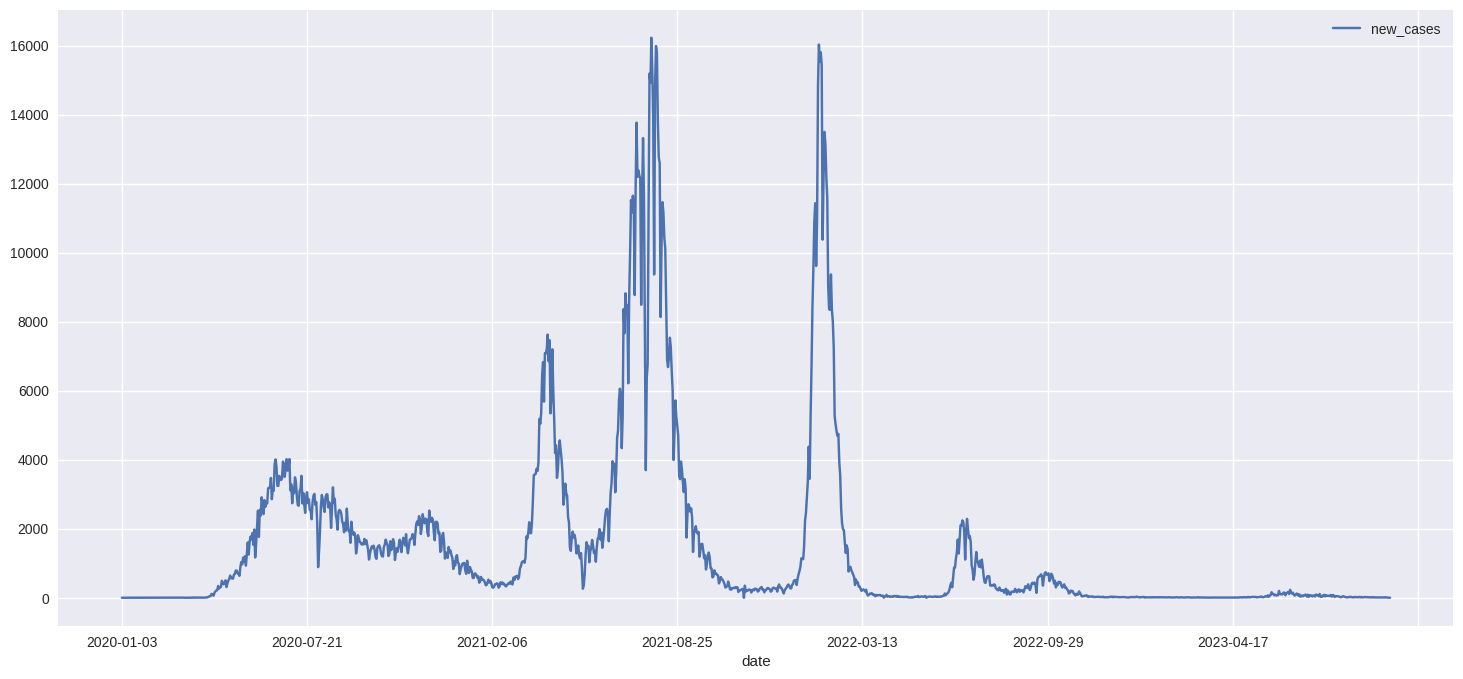

In [9]:
# plotting new cases over time
bd_cases.plot(x = 'date', y = 'new_cases', figsize=(18,8))

<Axes: xlabel='date'>

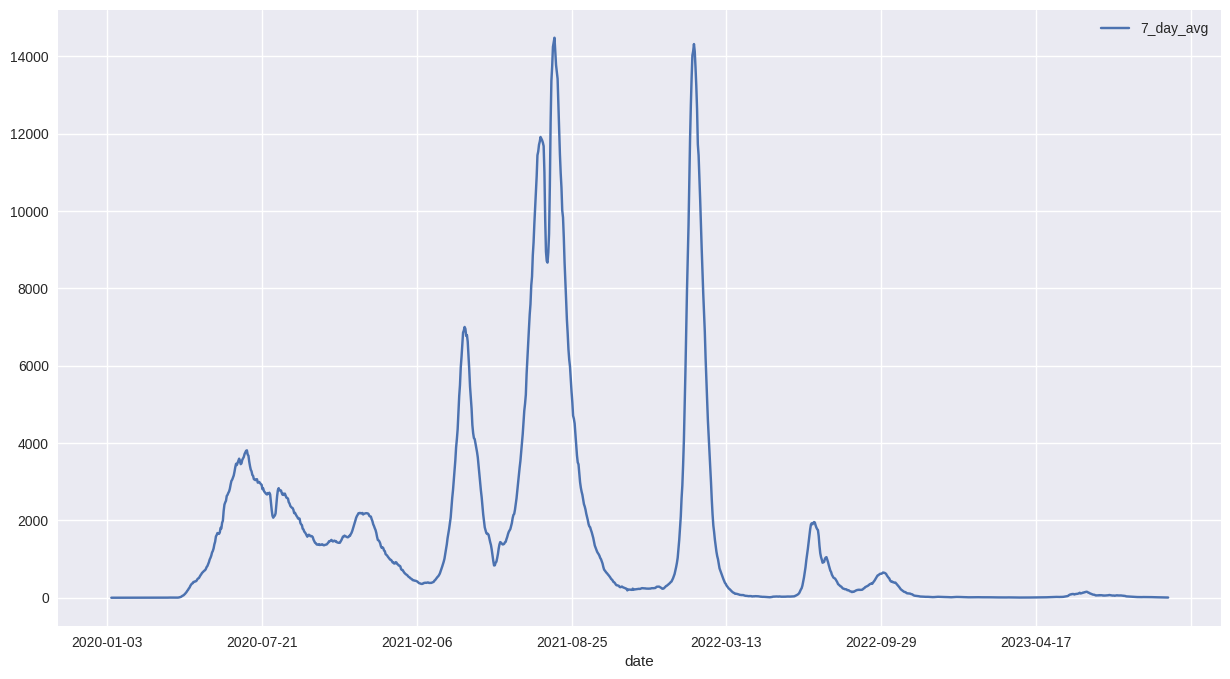

In [10]:
# smoothen out the line with a 7 day moving average
bd_cases['7_day_avg'] = bd_cases['new_cases'].rolling(window=7).mean()
bd_cases.plot(x='date', y='7_day_avg', figsize=(15,8))

interactive(children=(Dropdown(description='metric', options=('total_cases', 'new_cases', 'new_cases_smoothed'…

<function __main__.multiplot(metric)>

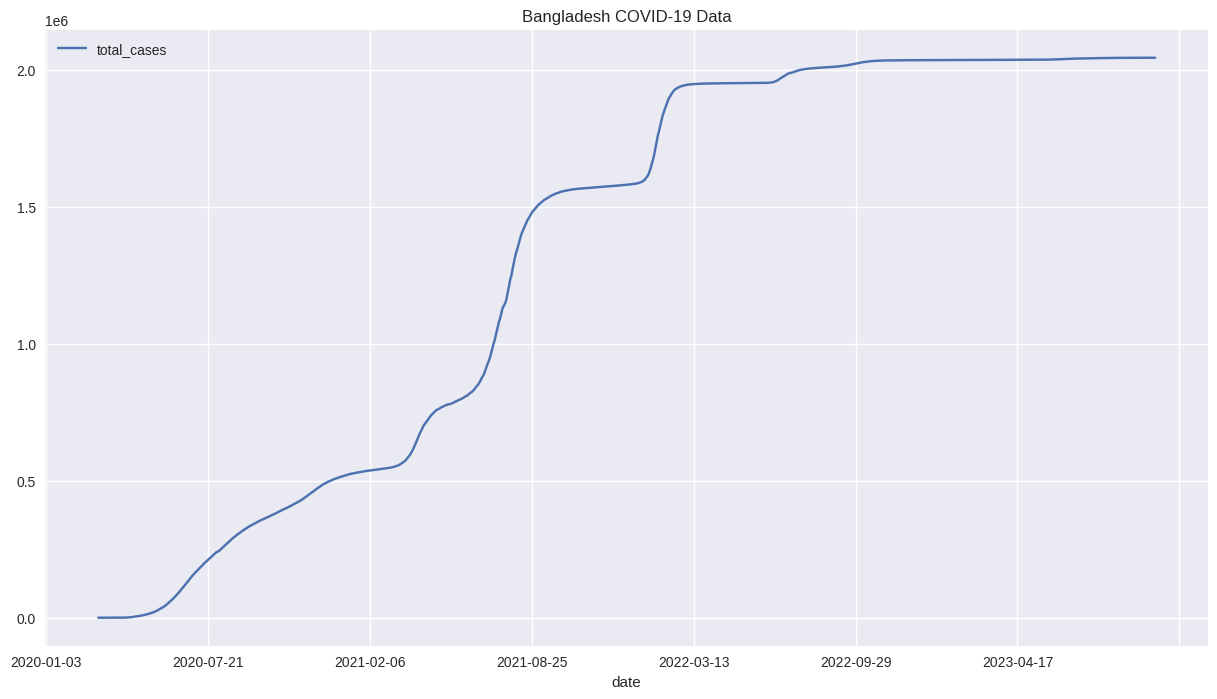

In [11]:
# plotting any metric over time
def multiplot(metric):
    bd_cases.plot(x='date', y=metric, figsize=(15,8), title='Bangladesh COVID-19 Data')

interact(multiplot, metric=list(df.columns)[4:])

# We will make a new data frame with the data that we need for the machine learning part.


In [12]:
selected_columns = [
    'iso_code',
    'continent',
    'location',
    'date',
    'new_cases',
    'new_deaths',
    'hosp_patients',
    'total_vaccinations',
    'people_vaccinated',
    'people_fully_vaccinated',
]

In [13]:
data = df[selected_columns]

In [14]:
data

,iso_code,continent,location,date,new_cases,new_deaths,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
346611,ZWE,Africa,Zimbabwe,2023-09-30,0.0,0.0,NaN,NaN,NaN,NaN
346612,ZWE,Africa,Zimbabwe,2023-10-01,0.0,0.0,NaN,NaN,NaN,NaN
346613,ZWE,Africa,Zimbabwe,2023-10-02,0.0,0.0,NaN,NaN,NaN,NaN
346614,ZWE,Africa,Zimbabwe,2023-10-03,0.0,0.0,NaN,NaN,NaN,NaN


# pre processing the data

In [15]:
numeric_columns = ['new_cases', 'new_deaths', 'hosp_patients', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
data[numeric_columns] = data[numeric_columns].fillna(0)

In [16]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

In [17]:
data

,iso_code,continent,location,date,new_cases,new_deaths,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
346611,ZWE,Africa,Zimbabwe,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0
346612,ZWE,Africa,Zimbabwe,2023-10-01,0.0,0.0,0.0,0.0,0.0,0.0
346613,ZWE,Africa,Zimbabwe,2023-10-02,0.0,0.0,0.0,0.0,0.0,0.0
346614,ZWE,Africa,Zimbabwe,2023-10-03,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
agg_data = data.groupby('location').apply(lambda group: group.sort_values('date')).reset_index(drop=True)
agg_data['daily_vaccination_rate'] = agg_data.groupby('location')['people_vaccinated'].diff() / agg_data['new_cases']

In [19]:
agg_data

,iso_code,continent,location,date,new_cases,new_deaths,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccination_rate
0,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
346611,ZWE,Africa,Zimbabwe,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0,NaN
346612,ZWE,Africa,Zimbabwe,2023-10-01,0.0,0.0,0.0,0.0,0.0,0.0,NaN
346613,ZWE,Africa,Zimbabwe,2023-10-02,0.0,0.0,0.0,0.0,0.0,0.0,NaN
346614,ZWE,Africa,Zimbabwe,2023-10-03,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [20]:
data

,iso_code,continent,location,date,new_cases,new_deaths,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
346611,ZWE,Africa,Zimbabwe,2023-09-30,0.0,0.0,0.0,0.0,0.0,0.0
346612,ZWE,Africa,Zimbabwe,2023-10-01,0.0,0.0,0.0,0.0,0.0,0.0
346613,ZWE,Africa,Zimbabwe,2023-10-02,0.0,0.0,0.0,0.0,0.0,0.0
346614,ZWE,Africa,Zimbabwe,2023-10-03,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:

from scipy.interpolate import interp1d


# Find the indices with '0.0' values in the columns
zero_indices = (data['total_vaccinations'] == 0) & \
               (data['people_vaccinated'] == 0) & \
               (data['people_fully_vaccinated'] == 0)

# Convert date values to int64
date_values = data['date'].values.astype(np.int64)

# Extract vaccination columns for interpolation
vaccination_values = data[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].values

# Create an interpolation function using linear interpolation
linear_interp = interp1d(date_values[~zero_indices], vaccination_values[~zero_indices], axis=0, kind='linear', fill_value='extrapolate')

# Interpolate missing values for the '0.0' values
interpolated_values = linear_interp(date_values[zero_indices])

# Assign the interpolated values back to the DataFrame
data.loc[zero_indices, ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']] = interpolated_values

# Now, your_dataframe contains the columns with linear-interpolated values where '0.0' values were present
print(data)

       iso_code continent     location       date  new_cases  new_deaths  \
0           AFG      Asia  Afghanistan 2020-01-03        0.0         0.0   
1           AFG      Asia  Afghanistan 2020-01-04        0.0         0.0   
2           AFG      Asia  Afghanistan 2020-01-05        0.0         0.0   
3           AFG      Asia  Afghanistan 2020-01-06        0.0         0.0   
4           AFG      Asia  Afghanistan 2020-01-07        0.0         0.0   
...         ...       ...          ...        ...        ...         ...   
346611      ZWE    Africa     Zimbabwe 2023-09-30        0.0         0.0   
346612      ZWE    Africa     Zimbabwe 2023-10-01        0.0         0.0   
346613      ZWE    Africa     Zimbabwe 2023-10-02        0.0         0.0   
346614      ZWE    Africa     Zimbabwe 2023-10-03        0.0         0.0   
346615      ZWE    Africa     Zimbabwe 2023-10-04        0.0         0.0   

        hosp_patients  total_vaccinations  people_vaccinated  \
0                 0.0  

In [22]:
data

,iso_code,continent,location,date,new_cases,new_deaths,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
346611,ZWE,Africa,Zimbabwe,2023-09-30,0.0,0.0,0.0,1.163077e+08,4.151035e+07,34896816.0
346612,ZWE,Africa,Zimbabwe,2023-10-01,0.0,0.0,0.0,1.163079e+08,4.151035e+07,34896816.0
346613,ZWE,Africa,Zimbabwe,2023-10-02,0.0,0.0,0.0,1.163235e+08,4.151060e+07,34896850.0
346614,ZWE,Africa,Zimbabwe,2023-10-03,0.0,0.0,0.0,1.163384e+08,4.151079e+07,34896893.0


In [23]:

from scipy.interpolate import interp1d


# Find the indices with '0.0' values in the columns
zero_indices = (data['total_vaccinations'] == 0) & \
               (data['people_vaccinated'] == 0) & \
               (data['people_fully_vaccinated'] == 0)

# Convert date values to int64
date_values = data['date'].values.astype(np.int64)

# Extract vaccination columns for interpolation
vaccination_values = data[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].values

# Find the first non-zero index
first_non_zero_index = np.argmax(~zero_indices)

# Create an interpolation function using linear interpolation starting from the first non-zero value
linear_interp = interp1d(date_values[first_non_zero_index:], vaccination_values[first_non_zero_index:], axis=0, kind='linear', fill_value='extrapolate')

# Interpolate missing values for the '0.0' values
interpolated_values = linear_interp(date_values[zero_indices])

# Assign the interpolated values back to the DataFrame
data.loc[zero_indices, ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']] = interpolated_values

# Now, your_dataframe contains the columns with linear-interpolated values where '0.0' values were present
print(data)


       iso_code continent     location       date  new_cases  new_deaths  \
0           AFG      Asia  Afghanistan 2020-01-03        0.0         0.0   
1           AFG      Asia  Afghanistan 2020-01-04        0.0         0.0   
2           AFG      Asia  Afghanistan 2020-01-05        0.0         0.0   
3           AFG      Asia  Afghanistan 2020-01-06        0.0         0.0   
4           AFG      Asia  Afghanistan 2020-01-07        0.0         0.0   
...         ...       ...          ...        ...        ...         ...   
346611      ZWE    Africa     Zimbabwe 2023-09-30        0.0         0.0   
346612      ZWE    Africa     Zimbabwe 2023-10-01        0.0         0.0   
346613      ZWE    Africa     Zimbabwe 2023-10-02        0.0         0.0   
346614      ZWE    Africa     Zimbabwe 2023-10-03        0.0         0.0   
346615      ZWE    Africa     Zimbabwe 2023-10-04        0.0         0.0   

        hosp_patients  total_vaccinations  people_vaccinated  \
0                 0.0  

In [24]:
data

,iso_code,continent,location,date,new_cases,new_deaths,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
346611,ZWE,Africa,Zimbabwe,2023-09-30,0.0,0.0,0.0,1.163077e+08,4.151035e+07,34896816.0
346612,ZWE,Africa,Zimbabwe,2023-10-01,0.0,0.0,0.0,1.163079e+08,4.151035e+07,34896816.0
346613,ZWE,Africa,Zimbabwe,2023-10-02,0.0,0.0,0.0,1.163235e+08,4.151060e+07,34896850.0
346614,ZWE,Africa,Zimbabwe,2023-10-03,0.0,0.0,0.0,1.163384e+08,4.151079e+07,34896893.0


In [25]:
# Replace NaN values with zero in specific columns
columns_to_fill_with_zero = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']  # Replace with the actual column names
data[columns_to_fill_with_zero] = data[columns_to_fill_with_zero].fillna(0)

# Alternatively, to replace NaN values with zero in the entire DataFrame:
data = data.fillna(0)

In [26]:
data.head(10)

,iso_code,continent,location,date,new_cases,new_deaths,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0
5,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0
6,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0
7,AFG,Asia,Afghanistan,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0
8,AFG,Asia,Afghanistan,2020-01-11,0.0,0.0,0.0,0.0,0.0,0.0
9,AFG,Asia,Afghanistan,2020-01-12,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
data

,iso_code,continent,location,date,new_cases,new_deaths,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
1,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
2,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
3,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
4,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...
346611,ZWE,Africa,Zimbabwe,2023-09-30,0.0,0.0,0.0,1.163077e+08,4.151035e+07,34896816.0
346612,ZWE,Africa,Zimbabwe,2023-10-01,0.0,0.0,0.0,1.163079e+08,4.151035e+07,34896816.0
346613,ZWE,Africa,Zimbabwe,2023-10-02,0.0,0.0,0.0,1.163235e+08,4.151060e+07,34896850.0
346614,ZWE,Africa,Zimbabwe,2023-10-03,0.0,0.0,0.0,1.163384e+08,4.151079e+07,34896893.0


In [28]:
print(data.columns)

Index(['iso_code', 'continent', 'location', 'date', 'new_cases', 'new_deaths',
       'hosp_patients', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated'],
      dtype='object')


In [29]:
data = data.drop(['date'], axis = 1)

In [30]:
data.tail(20)

,iso_code,continent,location,new_cases,new_deaths,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated
346596,ZWE,Africa,Zimbabwe,0.0,0.0,0.0,8.523315e+08,5.512054e+08,458465396.0
346597,ZWE,Africa,Zimbabwe,6.0,0.0,0.0,8.523315e+08,5.512054e+08,458465396.0
346598,ZWE,Africa,Zimbabwe,0.0,0.0,0.0,2.146698e+07,1.807712e+07,17299194.0
346599,ZWE,Africa,Zimbabwe,0.0,0.0,0.0,1.162308e+08,4.150840e+07,34896429.0
346600,ZWE,Africa,Zimbabwe,0.0,0.0,0.0,2.156542e+07,1.814812e+07,17370015.0
346601,ZWE,Africa,Zimbabwe,0.0,0.0,0.0,1.162501e+08,4.150883e+07,34896524.0
346602,ZWE,Africa,Zimbabwe,0.0,0.0,0.0,1.162580e+08,4.150908e+07,34896566.0
346603,ZWE,Africa,Zimbabwe,0.0,0.0,0.0,1.162655e+08,4.150933e+07,34896613.0
346604,ZWE,Africa,Zimbabwe,0.0,0.0,0.0,1.162664e+08,4.150936e+07,34896616.0
346605,ZWE,Africa,Zimbabwe,0.0,0.0,0.0,1.162666e+08,4.150936e+07,34896618.0


# we will remove all the rows where people_full_vaccinated is zero. Because we want to see the infection rate after the vaccination starts.

In [31]:
data = data[data['people_fully_vaccinated'] != 0]

In [32]:
data

,iso_code,continent,location,new_cases,new_deaths,hosp_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated
348,AFG,Asia,Afghanistan,219.0,26.0,0.0,1.500000e+06,0.000000e+00,1.818989e-12
351,AFG,Asia,Afghanistan,254.0,5.0,0.0,1.500075e+06,7.100000e+01,4.000000e+00
352,AFG,Asia,Afghanistan,80.0,17.0,0.0,1.507472e+06,7.468000e+03,4.000000e+00
353,AFG,Asia,Afghanistan,142.0,20.0,0.0,1.532395e+06,3.239100e+04,4.000000e+00
354,AFG,Asia,Afghanistan,210.0,15.0,0.0,1.577064e+06,7.706000e+04,4.000000e+00
...,...,...,...,...,...,...,...,...,...
346611,ZWE,Africa,Zimbabwe,0.0,0.0,0.0,1.163077e+08,4.151035e+07,3.489682e+07
346612,ZWE,Africa,Zimbabwe,0.0,0.0,0.0,1.163079e+08,4.151035e+07,3.489682e+07
346613,ZWE,Africa,Zimbabwe,0.0,0.0,0.0,1.163235e+08,4.151060e+07,3.489685e+07
346614,ZWE,Africa,Zimbabwe,0.0,0.0,0.0,1.163384e+08,4.151079e+07,3.489689e+07


In [33]:
data.shape

(246252, 9)

# Machine Learning part:

We want to predict new_cases based on people_fully_vaccinated.

#LSTM

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [35]:
# Normalize the data
scaler = MinMaxScaler()
data[['new_cases', 'people_fully_vaccinated']] = scaler.fit_transform(data[['new_cases', 'people_fully_vaccinated']])


In [36]:

# Split data into features (X) and target (y)
X = data['people_fully_vaccinated'].values
y = data['new_cases'].values

In [40]:
X

array([1.80383418e-19, 7.73230664e-10, 7.73230664e-10, ...,
       6.74582862e-03, 6.74583693e-03, 6.74584466e-03])

In [42]:
y

array([2.60653436e-05, 3.02310377e-05, 9.52158669e-06, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [44]:
print(X.shape)
print(y.shape)

(246252,)
(246252,)


In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(197001,)
(197001,)
(49251,)
(49251,)


In [47]:
# Create sequences
sequence_length = 10  # You can adjust this hyperparameter
X_train_seq, y_train_seq = [], []

for i in range(len(X_train) - sequence_length):
    X_train_seq.append(X_train[i:i+sequence_length])
    y_train_seq.append(y_train[i+sequence_length])

X_train_seq, y_train_seq = np.array(X_train_seq), np.array(y_train_seq)

In [48]:
print(X_train_seq.shape)
print(y_train_seq.shape)

(196991, 10)
(196991,)


In [137]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [138]:
# Train the model
model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32)

Epoch 1/10
6156/6156 [==============================] - 50s 7ms/step - loss: 2.0493e-04
Epoch 2/10
6156/6156 [==============================] - 46s 7ms/step - loss: 2.0476e-04
Epoch 3/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.0469e-04
Epoch 4/10
6156/6156 [==============================] - 51s 8ms/step - loss: 2.0486e-04
Epoch 5/10
6156/6156 [==============================] - 47s 8ms/step - loss: 2.0477e-04
Epoch 6/10
6156/6156 [==============================] - 49s 8ms/step - loss: 2.0462e-04
Epoch 7/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.0468e-04
Epoch 8/10
6156/6156 [==============================] - 45s 7ms/step - loss: 2.0471e-04
Epoch 9/10
6156/6156 [==============================] - 45s 7ms/step - loss: 2.0464e-04
Epoch 10/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.0479e-04


In [139]:
# Evaluate the model
X_test_seq = []

for i in range(len(X_test) - sequence_length):
    X_test_seq.append(X_test[i:i+sequence_length])

X_test_seq = np.array(X_test_seq)
y_pred = model.predict(X_test_seq)

1539/1539 [==============================] - 4s 3ms/step


In [140]:
print(X_test_seq.shape)
print(y_pred.shape)

(49241, 10)
(49241, 1)


In [142]:
# Inverse transform the predictions to get them in the original scale
#y_pred = scaler.inverse_transform(y_pred)

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test[sequence_length:], y_pred)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test[sequence_length:], y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.8f}")
print(f"Mean Squared Error (MSE): {mse:.8f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.8f}")

Mean Absolute Error (MAE): 0.00251675
Mean Squared Error (MSE): 0.00025270
Root Mean Squared Error (RMSE): 0.01589647


# SVR

In [144]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create a Support Vector Regressor
svr = SVR(kernel='linear')

# Train the model
svr.fit(X_train_seq, y_train_seq)

# Make predictions using the SVR model
y_pred_svr = svr.predict(X_test_seq)

# Calculate the Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test[sequence_length:], y_pred_svr)


In [161]:

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test[sequence_length:], y_pred_svr)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test[sequence_length:], y_pred_svr)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE) - svr: {mae:.8f}")
print(f"Mean Squared Error (MSE) - svr: {mse:.8f}")
print(f"Root Mean Squared Error (RMSE) - svr: {rmse:.8f}")

Mean Absolute Error (MAE) - svr: 0.09925030
Mean Squared Error (MSE) - svr: 0.00996868
Root Mean Squared Error (RMSE) - svr: 0.09984329


# Random Forest

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_seq, y_train_seq)

# Make predictions using the Random Forest model
y_pred_rf = rf.predict(X_test_seq)

# Calculate the Mean Squared Error (MSE)
#mse_rf = mean_squared_error(y_test[sequence_length:], y_pred_rf)


In [153]:

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test[sequence_length:], y_pred_rf)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test[sequence_length:], y_pred_rf)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE) - rf: {mae:.8f}")
print(f"Mean Squared Error (MSE) - rf: {mse:.8f}")
print(f"Root Mean Squared Error (RMSE) - rf: {rmse:.8f}")

Mean Absolute Error (MAE) - rf: 0.00302634
Mean Squared Error (MSE) - rf: 0.00025891
Root Mean Squared Error (RMSE) - rf: 0.01609072


# CNN

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
import numpy as np

# Assuming you have already prepared X_train_seq and X_test_seq as 2D input data
# Reshape the data into a 2D format
X_train_seq_2d = X_train_seq.reshape(X_train_seq.shape[0], X_train_seq.shape[1], 1)
X_test_seq_2d = X_test_seq.reshape(X_test_seq.shape[0], X_test_seq.shape[1], 1)

# Create a CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(sequence_length, 1, 1)))
model.add(Flatten())
model.add(Dense(1))

# Compile and train the model (you can use the same train and test splits as before)
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq_2d, y_train_seq, epochs=10, batch_size=32)

# Make predictions using the CNN model
y_pred_cnn = model.predict(X_test_seq_2d)


Epoch 1/10
6156/6156 [==============================] - 21s 3ms/step - loss: 2.0695e-04
Epoch 2/10
6156/6156 [==============================] - 13s 2ms/step - loss: 2.0484e-04
Epoch 3/10
6156/6156 [==============================] - 12s 2ms/step - loss: 2.0476e-04
Epoch 4/10
6156/6156 [==============================] - 12s 2ms/step - loss: 2.0478e-04
Epoch 5/10
6156/6156 [==============================] - 12s 2ms/step - loss: 2.0472e-04
Epoch 6/10
6156/6156 [==============================] - 12s 2ms/step - loss: 2.0468e-04
Epoch 7/10
6156/6156 [==============================] - 12s 2ms/step - loss: 2.0477e-04
Epoch 8/10
6156/6156 [==============================] - 12s 2ms/step - loss: 2.0466e-04
Epoch 9/10
6156/6156 [==============================] - 18s 3ms/step - loss: 2.0480e-04
Epoch 10/10
1539/1539 [==============================] - 2s 1ms/step


In [151]:

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test[sequence_length:], y_pred_cnn)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test[sequence_length:], y_pred_cnn)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE) - cnn: {mae:.8f}")
print(f"Mean Squared Error (MSE) - cnn: {mse:.8f}")
print(f"Root Mean Squared Error (RMSE) - cnn: {rmse:.8f}")

Mean Absolute Error (MAE) - cnn: 0.00389313
Mean Squared Error (MSE) - cnn: 0.00025506
Root Mean Squared Error (RMSE) - cnn: 0.01597075


# Gradient Boosting Regressor

In [154]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gbr.fit(X_train_seq, y_train_seq)

# Make predictions using GBR
y_pred_gbr = gbr.predict(X_test_seq)

# Calculate the Mean Squared Error (MSE) for GBR
mse_gbr = mean_squared_error(y_test[sequence_length:], y_pred_gbr)


In [155]:

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test[sequence_length:], y_pred_gbr)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test[sequence_length:], y_pred_gbr)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE) - gbr: {mae:.8f}")
print(f"Mean Squared Error (MSE) - gbr: {mse:.8f}")
print(f"Root Mean Squared Error (RMSE) - gbr: {rmse:.8f}")

Mean Absolute Error (MAE) - gbr: 0.00249716
Mean Squared Error (MSE) - gbr: 0.00025505
Root Mean Squared Error (RMSE) - gbr: 0.01597015


# FNN

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError

# Create a Feedforward Neural Network (FNN) model
fnn = Sequential()
fnn.add(Dense(64, activation='relu', input_shape=(sequence_length,)))
fnn.add(Dense(32, activation='relu'))
fnn.add(Dense(1))  # Output layer for regression task

# Compile the model
fnn.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])

# Train the FNN model
fnn.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32)

# Make predictions using the FNN model
y_pred_fnn = fnn.predict(X_test_seq)

# Evaluate the FNN model
mse_fnn = mean_squared_error(y_test[sequence_length:], y_pred_fnn)

#print(f"FNN Mean Squared Error (MSE): {mse_fnn:.2f}")


Epoch 1/10
6156/6156 [==============================] - 19s 3ms/step - loss: 2.0720e-04 - mean_squared_error: 2.0720e-04
Epoch 2/10
6156/6156 [==============================] - 21s 3ms/step - loss: 2.0467e-04 - mean_squared_error: 2.0467e-04
Epoch 3/10
6156/6156 [==============================] - 21s 3ms/step - loss: 2.0464e-04 - mean_squared_error: 2.0464e-04
Epoch 4/10
6156/6156 [==============================] - 14s 2ms/step - loss: 2.0480e-04 - mean_squared_error: 2.0480e-04
Epoch 5/10
6156/6156 [==============================] - 12s 2ms/step - loss: 2.0478e-04 - mean_squared_error: 2.0478e-04
Epoch 6/10
6156/6156 [==============================] - 12s 2ms/step - loss: 2.0468e-04 - mean_squared_error: 2.0468e-04
Epoch 7/10
6156/6156 [==============================] - 70s 11ms/step - loss: 2.0469e-04 - mean_squared_error: 2.0469e-04
Epoch 8/10
6156/6156 [==============================] - 12s 2ms/step - loss: 2.0475e-04 - mean_squared_error: 2.0475e-04
Epoch 9/10
6156/6156 [=========

In [158]:

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test[sequence_length:], y_pred_fnn)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test[sequence_length:], y_pred_fnn)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE) - fnn: {mae:.8f}")
print(f"Mean Squared Error (MSE) - fnn: {mse:.8f}")
print(f"Root Mean Squared Error (RMSE) - gbr: {rmse:.8f}")

Mean Absolute Error (MAE) - fnn: 0.00181705
Mean Squared Error (MSE) - fnn: 0.00025338
Root Mean Squared Error (RMSE) - gbr: 0.01591784


#XGBoost

In [159]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create an XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the XGBoost model
xgb_regressor.fit(X_train_seq, y_train_seq)

# Make predictions using the XGBoost model
y_pred_xgb = xgb_regressor.predict(X_test_seq)

# Calculate the Mean Squared Error (MSE) for XGBoost
mse_xgb = mean_squared_error(y_test[sequence_length:], y_pred_xgb)


In [160]:

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test[sequence_length:], y_pred_xgb)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test[sequence_length:], y_pred_xgb)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE) - fnn: {mae:.8f}")
print(f"Mean Squared Error (MSE) - fnn: {mse:.8f}")
print(f"Root Mean Squared Error (RMSE) - gbr: {rmse:.8f}")

Mean Absolute Error (MAE) - fnn: 0.00274297
Mean Squared Error (MSE) - fnn: 0.00027502
Root Mean Squared Error (RMSE) - gbr: 0.01658363


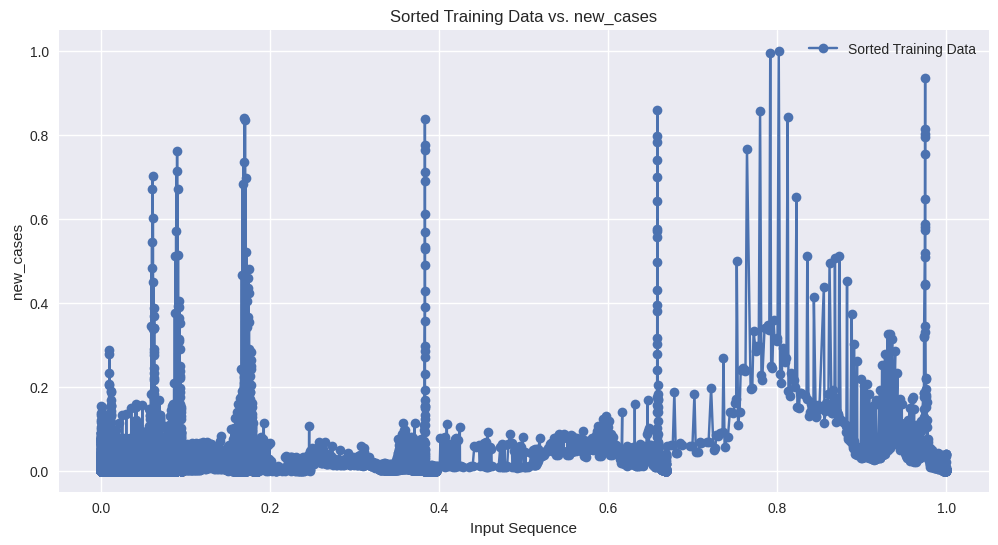

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the training data by X_train_seq values
sorted_indices = np.argsort(X)  # Sort by the first column of X_train_seq
X = X[sorted_indices]
y = y[sorted_indices]

# Plot the sorted training data
plt.figure(figsize=(12, 6))
plt.plot(X, y, label='Sorted Training Data', marker='o', linestyle='-')
plt.xlabel('Input Sequence')
plt.ylabel('new_cases')
plt.title('Sorted Training Data vs. new_cases')
plt.legend()
plt.grid(True)
plt.show()
